In [12]:
import numpy as np # generic math functions
import matplotlib.pyplot as plt
#%matplotlib notebook
%matplotlib inline

In [35]:
from quspin.operators import hamiltonian # Hamiltonians and operators
from quspin.basis import spin_basis_1d # Hilbert space spin basis
import numpy as np # generic math functions
import time

def Ham_int_XXZ(L, Delta):
    basis = spin_basis_1d(L)
    J=1.0
    J_arr =[[J,i,(i+1)%L] for i in range(L)] # PBC [[J,i,(i+1)] for i in range(L-1)] # OBC  
    Delta_arr =[[Delta,i,(i+1)%L] for i in range(L)] # PBC     
    # static and dynamic lists
    static = [["zz",Delta_arr],["xx",J_arr], ["yy",J_arr] ]
    dynamic =[]
    H = hamiltonian(static,dynamic,basis=basis,dtype=np.float_,check_symm=False,check_herm=False)
    return H



def del_lambda_Ham(L):
    basis = spin_basis_1d(L)  
    hz_lamb=1.0
    hz_lamb_arr = [[hz_lamb,i,(i+1)%L] for i in range(L)] #PBC 
    static_lamb = [["zz",hz_lamb_arr]]
    dynamic_lamb =[]
    op_lamb=hamiltonian(static_lamb,dynamic_lamb,basis=basis,dtype=np.float_,check_symm=False,check_herm=False)
    return op_lamb

def output_gauge_potent(Ham,L):
    E,V= Ham.eigh()
    op_lamb_arr = del_lambda_Ham(L).toarray()
    x=np.dot(op_lamb_arr, V)
    num_lamb_mat =np.dot(V.T,x) #matrix multiplication
    wij = np.outer(E,np.ones(2**L))-np.outer(np.ones(2**L),E)
    return wij, num_lamb_mat
  
def gauge_potent_mu(wij,num_lamb_mat,mu):
    A_lamb = -1j*np.multiply(wij,num_lamb_mat)/(wij**2+ mu**2)#element-wise multiplication
    return A_lamb



def norm(A_lamb):    
    return np.linalg.norm(A_lamb, 'fro')

In [67]:
mu=1e-30
Delta=np.sqrt(5)
L_arr=range(2,11)
norm_arr_int=np.zeros(len(L_arr))
wij_min_arr= np.zeros(len(L_arr)) 
wij_max_arr= np.zeros(len(L_arr))  

###finding minimum and maximum wij
###running the loop    

for i in range(len(L_arr)):
    L=L_arr[i]
    H=Ham_int_XXZ(L, Delta)
    wij, num_lamb_mat=output_gauge_potent(H,L)
    index_lower = np.tril_indices(2**L,-1)
    wij_arr=wij[index_lower]
    wij_min_arr[i]= min(wij_arr)
    wij_max_arr[i]=max(wij_arr)
    A_lamb=gauge_potent_mu(wij, num_lamb_mat,mu)
    norm_arr_int[i]=norm(A_lamb)**2/2**L
    print L, norm_arr_int[i]

2 0.0
3 0.00048828125
4 0.00147928994083
5 0.0679996084941
6 0.371557077732
7 2.39916072595
8 1.506749216
9 0.0415810572303
10 182.172501094


In [65]:
mu=1e-20
Delta=-1.0
L_arr=range(2,11)
norm_arr_int=np.zeros(len(L_arr))
wij_min_arr= np.zeros(len(L_arr)) 
wij_max_arr= np.zeros(len(L_arr))  

###finding minimum and maximum wij
###running the loop    

for i in range(len(L_arr)):
    L=L_arr[i]
    H=Ham_int_XXZ(L, Delta)
    wij, num_lamb_mat=output_gauge_potent(H,L)
    index_lower = np.tril_indices(2**L,-1)
    wij_arr=wij[index_lower]
    wij_min_arr[i]= min(wij_arr)
    wij_max_arr[i]=max(wij_arr)
    A_lamb=gauge_potent_mu(wij, num_lamb_mat,mu)
    norm_arr_int[i]=norm(A_lamb)**2/2**L
    print L, norm_arr_int[i]

2 0.0
3 0.000258264462801
4 0.00308641975309
5 94.2482759544
6 2.13997728589e+29
7 3.50861724822e+23
8 1.40928840386e+30
9 0.359127641548
10 3.48514884329e+28


In [17]:
L_arr, wij_min_nonint

([2, 3, 4, 5, 6, 7], array([ 0.,  0.,  0.,  0.,  0.,  0.]))

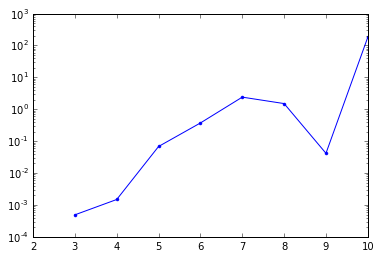

In [69]:
plt.semilogy(L_arr,norm_arr_int, 'b.-')

7